In [148]:
#imports 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [149]:
#reading in dataset train 
df = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')

In [150]:
#Setting max columns to make EDA easier 
pd.set_option('display.max_columns', None)

## Taking a look at the data 

In [151]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [152]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [153]:
df.columns[df.isna().any()].tolist()

['Lot Frontage',
 'Alley',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

In [154]:
"""
will need to fill in NA in:  
'Lot Frontage',  -mean
 'Alley',
 'Mas Vnr Type',  
 'Mas Vnr Area',  0 
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',  
 'BsmtFin SF 1',  mean 
 'BsmtFin Type 2',
 'BsmtFin SF 2',mean 
 'Bsmt Unf SF', mean 
 'Total Bsmt SF', mean 
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt', mean 
 'Garage Finish',
 'Garage Cars',  mean 
 'Garage Area',  mean 
 'Garage Qual',
 'Garage Cond',
 'Pool QC',
 'Fence',
 'Misc Feature']

0 by mas vnr area means that value will be set to zero as that is likely the case for a missing value there
mean indicates numerical values and ones that can be filled with the mean of the column, the others are catagorical and will need to be set to 0 when the columns are dummified 
"""


"\nwill need to fill in NA in:  \n'Lot Frontage',  -mean\n 'Alley',\n 'Mas Vnr Type',  \n 'Mas Vnr Area',  0 \n 'Bsmt Qual',\n 'Bsmt Cond',\n 'Bsmt Exposure',\n 'BsmtFin Type 1',  \n 'BsmtFin SF 1',  mean \n 'BsmtFin Type 2',\n 'BsmtFin SF 2',mean \n 'Bsmt Unf SF', mean \n 'Total Bsmt SF', mean \n 'Bsmt Full Bath',\n 'Bsmt Half Bath',\n 'Fireplace Qu',\n 'Garage Type',\n 'Garage Yr Blt', mean \n 'Garage Finish',\n 'Garage Cars',  mean \n 'Garage Area',  mean \n 'Garage Qual',\n 'Garage Cond',\n 'Pool QC',\n 'Fence',\n 'Misc Feature']\n\n0 by mas vnr area means that value will be set to zero as that is likely the case for a missing value there\nmean indicates numerical values and ones that can be filled with the mean of the column, the others are catagorical and will need to be set to 0 when the columns are dummified \n"

In [155]:
#data types seem to be correct 

In [156]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [157]:
#some numerical values appear to be catagories, as you can have 2 full baths or 3 full baths not 2.87 baths.  Columns that need to be dummified are: 
"""
'MS SubClass', 'MS Zoning',
'Street', 'Alley', 'Lot Shape', 'Land Contour',
'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
'Overall Qual', 'Overall Cond', 'Full Bath','Half Bath', 
'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Bsmt Full Bath',
'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Bsmt Half Bath', 'Bedroom AbvGr',
'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
 'Central Air', 'Electrical','Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type',
 'Garage Finish', 'Garage Qual', 'Garage Cars',
 'Garage Cond', 'Paved Drive', 'Mo Sold', 'Kitchen AbvGr',
'Pool QC', 'Fence', 'Misc Feature', 'Sale Type'])
"""

"\n'MS SubClass', 'MS Zoning',\n'Street', 'Alley', 'Lot Shape', 'Land Contour',\n'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',\n 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',\n'Overall Qual', 'Overall Cond', 'Full Bath','Half Bath', \n'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Bsmt Full Bath',\n'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Bsmt Half Bath', 'Bedroom AbvGr',\n'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',\n'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',\n 'Central Air', 'Electrical','Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type',\n 'Garage Finish', 'Garage Qual', 'Garage Cars',\n 'Garage Cond', 'Paved Drive', 'Mo Sold', 'Kitchen AbvGr',\n'Pool QC', 'Fence', 'Misc Feature', 'Sale Type'])\n"

In [158]:
#finding Mean 
df['SalePrice'].mean()

181469.70160897123

In [159]:
#median 
df['SalePrice'].median()

162500.0

## Making visulization of the numerical values to find outlyers

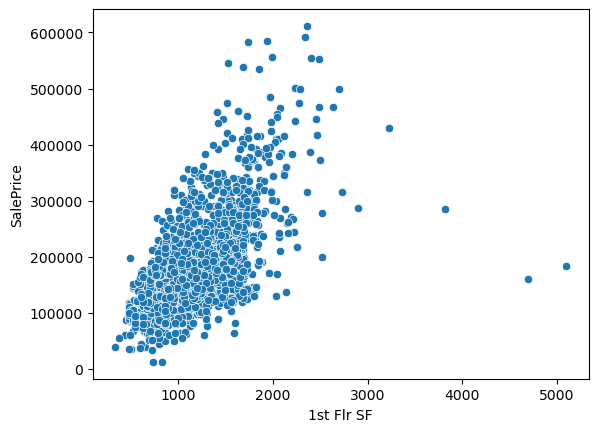

In [160]:
sns.scatterplot(x=df['1st Flr SF'], y = df['SalePrice']);
#remove the two outlyers above 4000

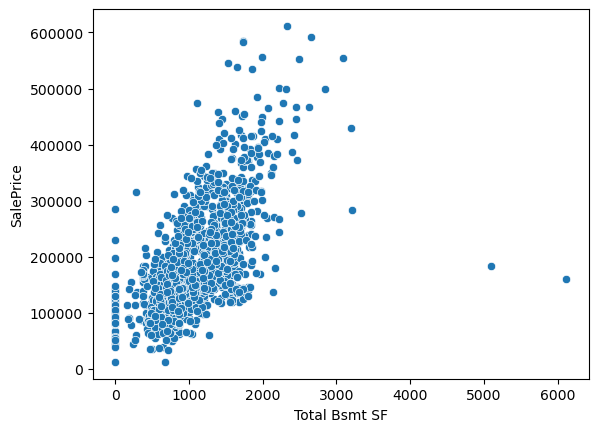

In [161]:
sns.scatterplot(x=df['Total Bsmt SF'], y = df['SalePrice']);
#remove two outlyers above 5000 

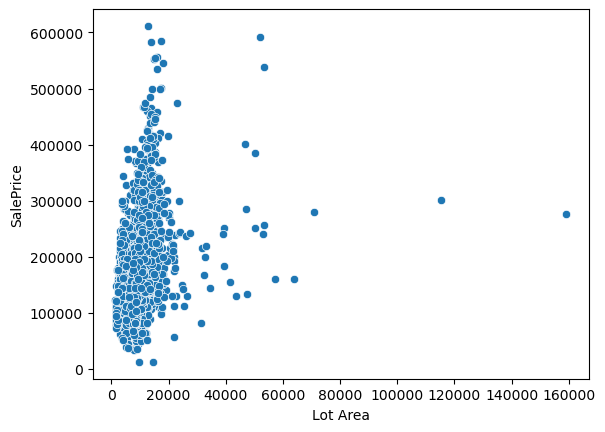

In [162]:
sns.scatterplot(x=df['Lot Area'], y = df['SalePrice']);
#there seems to be some scattering, but i think there are too many to remove and so will keep them in place 

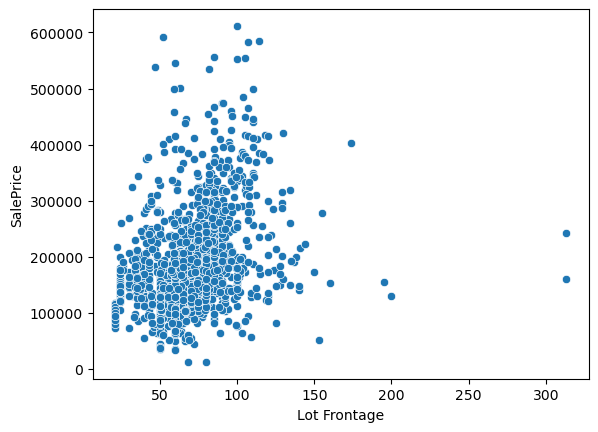

In [163]:
sns.scatterplot(x=df['Lot Frontage'], y = df['SalePrice']);
#will remove the two outlyers above 300 

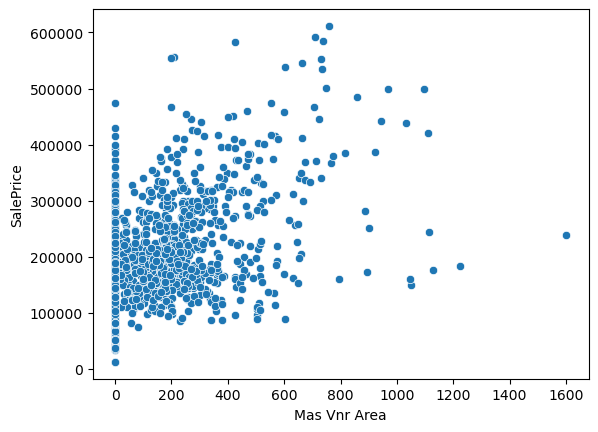

In [164]:
sns.scatterplot(x=df['Mas Vnr Area'], y = df['SalePrice']);
#remove outlyer above 1500 

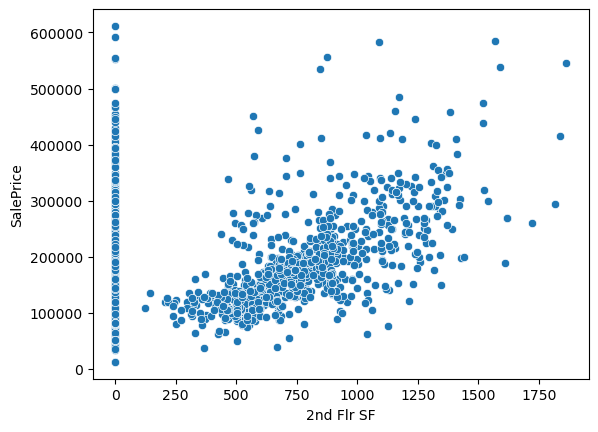

In [165]:
sns.scatterplot(x=df['2nd Flr SF'], y = df['SalePrice']);
#there seems to be some scattering, but i think there are too many to remove and so will keep them in place 

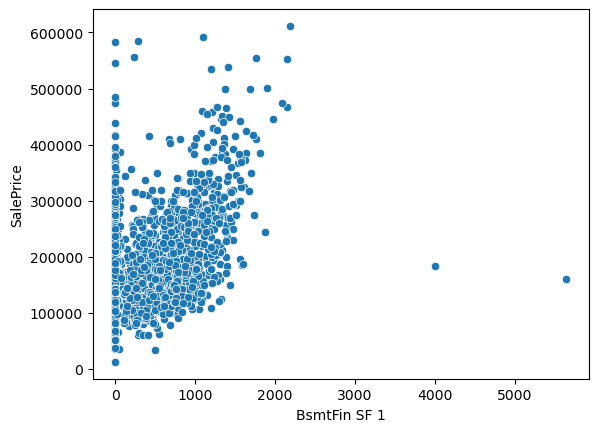

In [166]:
sns.scatterplot(x=df['BsmtFin SF 1'], y = df['SalePrice']);
#will remove outlyers above 3500

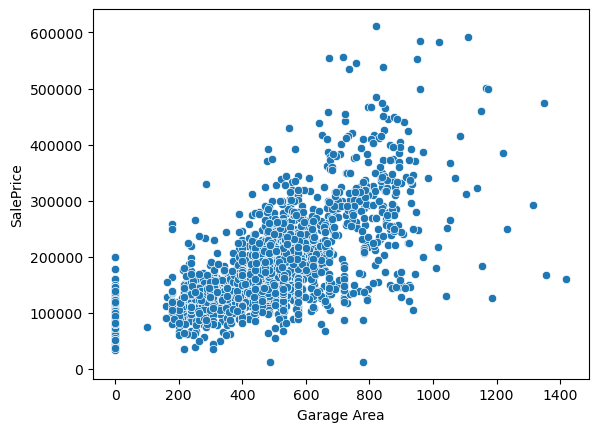

In [167]:
sns.scatterplot(x=df['Garage Area'], y = df['SalePrice']);
#there seems to be some scattering, but i think there are too many to remove and so will keep them in place 

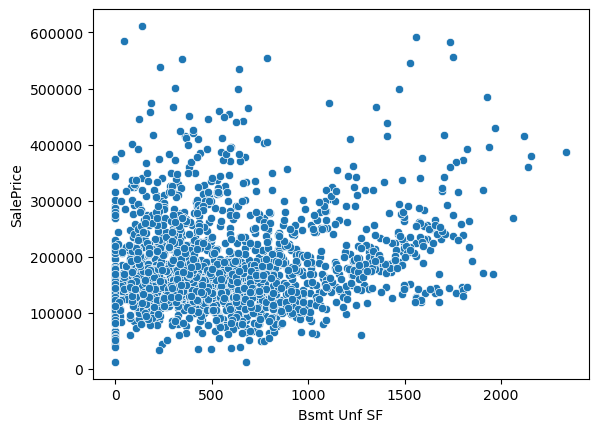

In [168]:
sns.scatterplot(x=df['Bsmt Unf SF'], y = df['SalePrice']);
#there seems to be some scattering, but i think there are too many to remove and so will keep them in place 

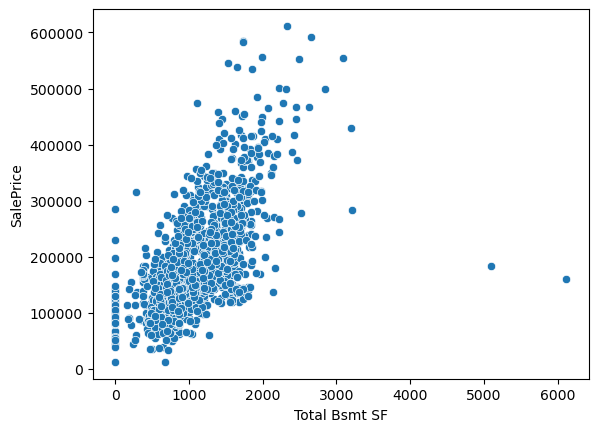

In [169]:
sns.scatterplot(x=df['Total Bsmt SF'], y = df['SalePrice']);
#will remove outlyers above 4500

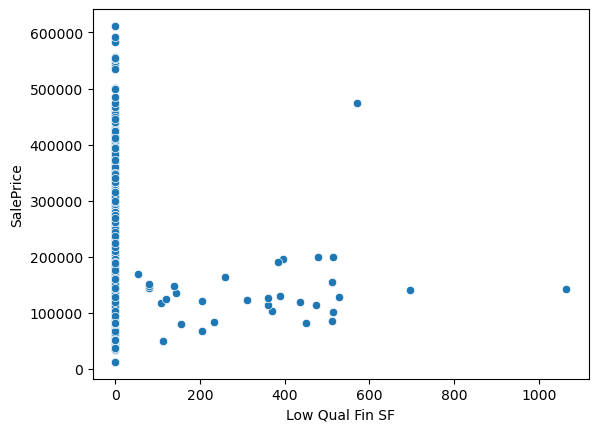

In [170]:
sns.scatterplot(x=df['Low Qual Fin SF'], y = df['SalePrice']);
#because the majority of these values are set at 0 there are limited values, so i will leave this one in place.  

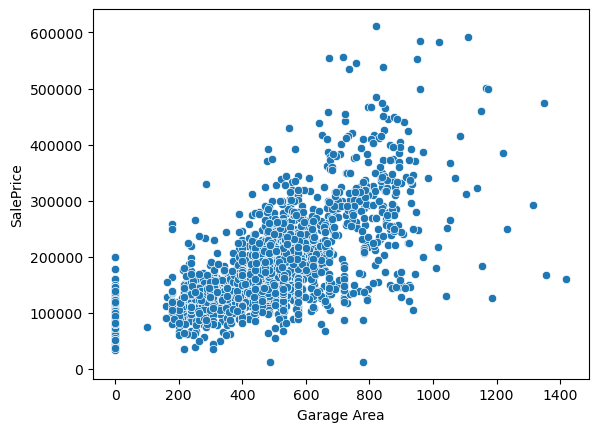

In [171]:
sns.scatterplot(x=df['Garage Area'], y = df['SalePrice']);
#there seems to be some scattering, but i think there are too many to remove and so will keep them in place 

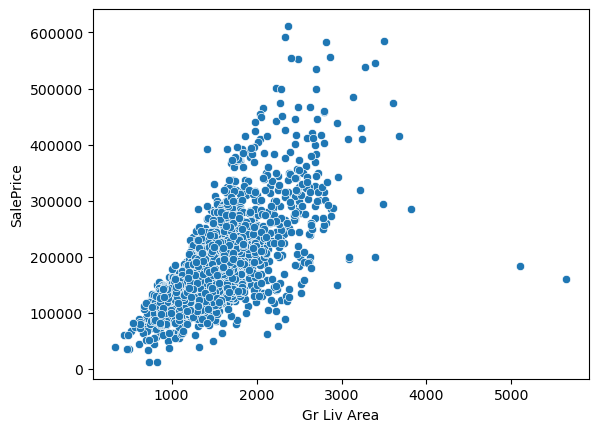

In [172]:
sns.scatterplot(x=df['Gr Liv Area'], y = df['SalePrice']);
#will remove outlyers above 4500